## 1. import library and data ##

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping
from collections import Counter  # label별 데이터 카운트를 위한 모듈

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 전처리 및 모델 성능평가 관련 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
####################################################################################

# scikit-learn 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공

from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.pipeline import *  # feature 처리 등의 변환과 ML 알고리즘 학습/예측 등을 함께 묶어서 실행하는 유틸리티 제공
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
dr = pd.read_csv("bank_train.csv")

In [29]:
df = dr
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [30]:
df = df.iloc[:1000,:]
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


## 2. EDA

In [31]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                1
CustGender                 1
CustLocation               0
CustAccountBalance         1
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

 - na값이 적은 관계로 모두 삭제
 - trnasactionID, customerID Column 삭제

In [32]:
df = df.dropna(axis=0)
df = df.drop(["TransactionID", "CustomerID"], axis=1)

In [33]:
# Object 형태의 Data 분포 확인 #
df1 = df.select_dtypes(exclude='float')
for c in df1.columns:
    print ("---- %s ---" % c)
    print (df1[c].value_counts())

---- CustomerDOB ---
1/1/1800    63
2/2/90       3
2/12/86      3
26/12/88     3
6/6/91       2
            ..
22/1/83      1
13/3/90      1
8/11/93      1
24/5/82      1
23/1/84      1
Name: CustomerDOB, Length: 865, dtype: int64
---- CustGender ---
M    732
F    265
Name: CustGender, dtype: int64
---- CustLocation ---
MUMBAI                 109
BANGALORE               83
NEW DELHI               79
DELHI                   69
GURGAON                 56
                      ... 
PALGHAR                  1
ANDHERI WEST MUMBAI      1
TANUKU                   1
SOUTH 24 PARGANAS        1
KHARSWAN JAMSHEDPUR      1
Name: CustLocation, Length: 258, dtype: int64
---- TransactionDate ---
21/10/16    781
9/8/16       31
6/8/16       28
3/8/16       26
1/8/16       24
4/8/16       23
7/8/16       22
5/8/16       18
12/8/16      16
2/8/16       14
8/8/16       14
Name: TransactionDate, dtype: int64
---- TransactionTime ---
215217    3
214921    2
205749    2
160125    2
194505    2
         ..
2

Column 별 조치사항  

TransactionDate : 연/월이 같으므로 일만 남김  
TransactionTime : 5자리 인건 앞에 한자리, 6자리인건 앞에 두자리만 시간으로 남기기  
CustomerDOB : 뒤에 2글자만 남기고 121에서 빼서 나이 구하기

## 2. 데이터 정리 ##

In [34]:
df["TransactionDate"] = df["TransactionDate"].astype(str).str[-2:]

In [35]:
df['TransactionTime'] = df['TransactionTime'].astype('str')
mask = df["TransactionTime"].str.len() == 5
df["TransactionTime"][mask] = '0'+ df["TransactionTime"][mask].astype(str)
df["TransactionTime"] = df["TransactionTime"].astype(str).str[:2]
df["TransactionTime"] = df["TransactionTime"].astype(int)

In [36]:
df['CustomerDOB'] = df['CustomerDOB'].astype('str')
df["CustomerDOB"] = df["CustomerDOB"].astype(str).str[-2:]
df["CustomerDOB"] = df["CustomerDOB"].astype(int)
df["CustomerDOB"] = 121 - df["CustomerDOB"]

In [37]:
# Labeling
object_col = ["CustGender", "CustLocation", "TransactionDate"]

LE=LabelEncoder()
for i in object_col:
    df[i]=df[[i]].apply(LE.fit_transform)

In [38]:
df.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,27,0,99,17819.05,0,14,25.0
1,64,1,102,2270.69,0,14,27999.0
2,25,0,142,17874.44,0,14,459.0
3,48,0,142,866503.21,0,14,2060.0
4,33,0,151,6714.43,0,18,1762.5


## 3.1 SOM

pip install somlearn
from somlearn import SOM
CLUSTERER = SOM(n_columns=1, n_rows=2, gridtype='hexagonal', random_state=70)
y_pred = CLUSTERER.fit_predict(df)
df["pred"]=y_pred
sns.scatterplot(df["x"],df["y"],hue=df["pred"])

- somlearn, som 다운 불가

In [39]:
# minisom 
from minisom import MiniSom
from matplotlib.gridspec import GridSpec

In [40]:
data = df.values

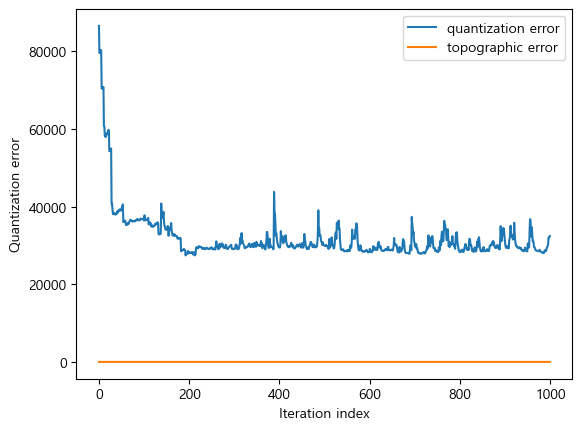

In [41]:
som_shape = (1, 5)

som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.5, learning_rate=0.5)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(df))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

In [42]:
som_winner = pd.DataFrame(np.array([som.winner(x) for x in data]).T)
som_winner = som_winner.loc[1,:]

som.winner의 2번째 row가 결과물로 보여짐

## 3.2 som 시각화

In [43]:
df["winner"] = som_winner

In [44]:
df.isna().sum()

CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
winner                     3
dtype: int64

In [59]:
df = df.fillna(0) 

<AxesSubplot:xlabel='CustAccountBalance', ylabel='TransactionAmount (INR)'>

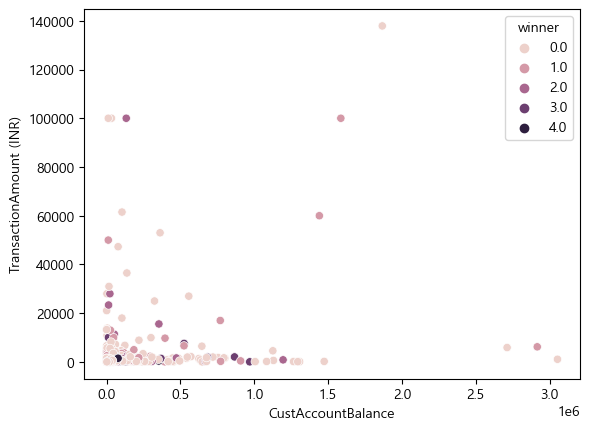

In [20]:
sns.scatterplot(x = 'CustAccountBalance', y = 'TransactionAmount (INR)', hue = 'winner', data = df)

### som이 깔릴 경우 코드 

#원하는 파라미터 조합 리스트화
map_n= [n for n in range(2,6)]
para_sigma= [np.round(sigma*0.1,2) for sigma in range(1,10)]
para_learning_rate= [np.round(learning_rate*0.1,2) for learning_rate in range(1,10)]

#결과 값을 담을 리스트 res 생성
res = []
#모든 조합에 대해 모델 생성 및 qe,te값 계산
for n in map_n:
    for sigma in para_sigma:
        for lr in para_learning_rate:
            
            try:
                #랜덤으로 초기값을 설정하는 경우
                estimator = MiniSom(n,n,4,sigma =sigma, learning_rate = lr, topology='hexagonal',random_seed=0)
                estimator.random_weights_init(df.values)
                estimator.train(df.values,1000,random_order=True)
                qe = estimator.quantization_error(df.values)
                #te = estimator.topographic_error(data.values)
                winner_coordinates = np.array([estimator.winner(x) for x in df.values]).T
                cluster_index = np.ravel_multi_index(winner_coordinates,(n,n))
                
                res.append([str(n)+'x'+str(n),sigma,lr,'random_init',qe,len(np.unique(cluster_index))])

                #pca로 초기값을 설정하는 경우
                estimator = MiniSom(n,n,4,sigma =sigma, learning_rate = lr,topology='hexagonal', random_seed=0)
                estimator.pca_weights_init(df.values)
                estimator.train(df.values,1000,random_order=True)
                qe = estimator.quantization_error(df.values)
                #te = estimator.topographic_error(data.values)
                winner_coordinates = np.array([estimator.winner(x) for x in df.values]).T
                cluster_index = np.ravel_multi_index(winner_coordinates,(n,n))
                
                res.append([str(n)+'x'+str(n),sigma,lr,'pca_init',qe,len(np.unique(cluster_index))])
                
            except ValueError as e:
                print(e)
            
#결과 데이터프레임 생성 및 sorting 
df_res = pd.DataFrame(res,columns=['map_size','sigma','learning_rate','init_method','qe','n_cluster']) 
df_res.shape
df_res.sort_values(by=['qe'],ascending=True,inplace=True,ignore_index=True)
df_res.head(10)

#시각화를 위한 lineplot 생성
plt.figure(figsize=(20,10))
sns.lineplot(data = df_res)

## 3.3 DBSCAN ##

In [94]:
from sklearn.cluster import DBSCAN 
db_scan = DBSCAN(eps=10000, min_samples=2).fit(data) 
db_scan.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  2,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  4,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  1,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  9,  0,  0

In [95]:
df = df.dropna(axis=0)
df['DBSCAN_LABEL'] = db_scan.labels_

<AxesSubplot:xlabel='CustAccountBalance', ylabel='TransactionAmount (INR)'>

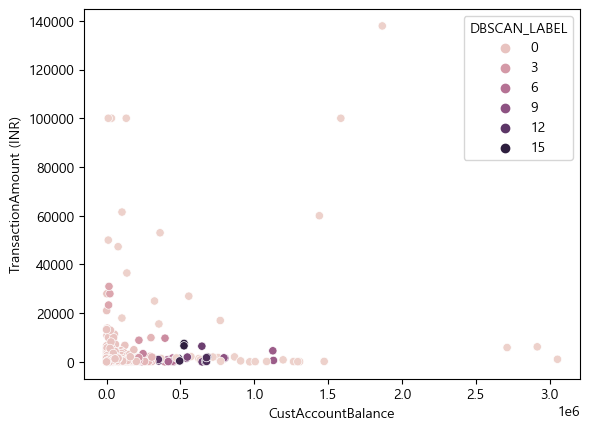

In [96]:
sns.scatterplot(x = 'CustAccountBalance', y = 'TransactionAmount (INR)', hue = 'DBSCAN_LABEL', data = df)

In [70]:
db_scan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1